In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv("zippedData/rt.movie_info.tsv.gz", sep="\t")

In [4]:
df2=pd.read_csv("zippedData/rt.reviews.tsv.gz", sep="\t", encoding='latin-1')

In [5]:
#df.iloc[30:50]
df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [6]:
df2.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [7]:
df=pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [8]:
df.production_budget=df.production_budget.apply(lambda x: x.strip('$'))

In [9]:
df.production_budget=df.production_budget.replace({",":''}, regex=True).apply(pd.to_numeric)

In [10]:
df.domestic_gross=df.domestic_gross.apply(lambda x: x.strip('$'))
df.domestic_gross=df.domestic_gross.replace({",":''}, regex=True).apply(pd.to_numeric)

In [11]:
df.worldwide_gross=df.worldwide_gross.apply(lambda x: x.strip('$'))
df.worldwide_gross=df.worldwide_gross.replace({",":''}, regex=True).apply(pd.to_numeric)

In [15]:
df['domestic_profit_margin']=(df.domestic_gross-df.production_budget)/df.production_budget

In [16]:
df['foreign_profit_margin']=(df.worldwide_gross-df.domestic_gross)/df.production_budget

In [17]:
df.release_date=pd.to_datetime(df.release_date)

In [18]:
df['release_year'] = df['release_date'].dt.year

In [125]:
bydates=df.sort_values(by = 'release_date')
low_cutoff=pd.to_datetime('01/01/2007')
high_cutoff=pd.to_datetime('06/06/2019')
bydate_temp=bydates.loc[(bydates.release_date >low_cutoff)&(bydates.release_date<high_cutoff)]

In [126]:
bydate=bydate_temp.loc[bydates.worldwide_gross!=0]
bydate.shape

(2593, 11)

In [127]:
#bydate.boxplot()

In [128]:
# df2=bydate.groupby('release_year').median().reset_index()
# df2.head()

In [129]:
# bydate['production_budget'].plot(kind="bar")

In [130]:
bydate['foreign_profit']=bydate['worldwide_gross']-bydate['domestic_gross']

/home/will/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [131]:
bydate['foreign_to_dom_ratio']=(bydate.foreign_profit)/(bydate.foreign_profit+ bydate.domestic_profit)*100

/home/will/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [132]:
bydate['d_f_ratio']=bydate.domestic_profit_margin/bydate.foreign_profit_margin

/home/will/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [133]:
bydate.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2593.0,4.992827e+01,2.843962e+01,1.000000e+00,2.600000e+01,5.000000e+01,7.400000e+01,1.000000e+02
production_budget,2593.0,3.922168e+07,5.131994e+07,9.000000e+03,7.000000e+06,2.000000e+07,4.750000e+07,4.250000e+08
domestic_gross,2593.0,4.811823e+07,8.020943e+07,0.000000e+00,1.183658e+06,1.865640e+07,5.803244e+07,9.366622e+08
worldwide_gross,2593.0,1.194598e+08,2.165075e+08,2.600000e+01,6.089100e+06,3.923323e+07,1.269313e+08,2.776345e+09
domestic_profit,2593.0,8.896557e+06,5.428239e+07,-2.019413e+08,-1.148868e+07,-1.289766e+06,1.688003e+07,6.306622e+08
domestic_profit_margin,2593.0,7.744251e-01,7.334570e+00,-1.000000e+00,-8.234591e-01,-2.230608e-01,7.253513e-01,2.388196e+02
foreign_profit_margin,2593.0,1.893038e+00,6.556228e+00,0.000000e+00,1.570718e-01,8.504200e-01,2.061707e+00,1.916983e+02
release_year,2593.0,2.012255e+03,3.400878e+00,2.007000e+03,2.009000e+03,2.012000e+03,2.015000e+03,2.019000e+03
d_f_ratio,2593.0,NaN,NaN,-inf,-2.465438e+00,-1.596647e-01,4.248443e-01,inf
foreign_profit,2593.0,7.134153e+07,1.433909e+08,0.000000e+00,1.405251e+06,1.679088e+07,6.823460e+07,2.015838e+09


KeyboardInterrupt: 

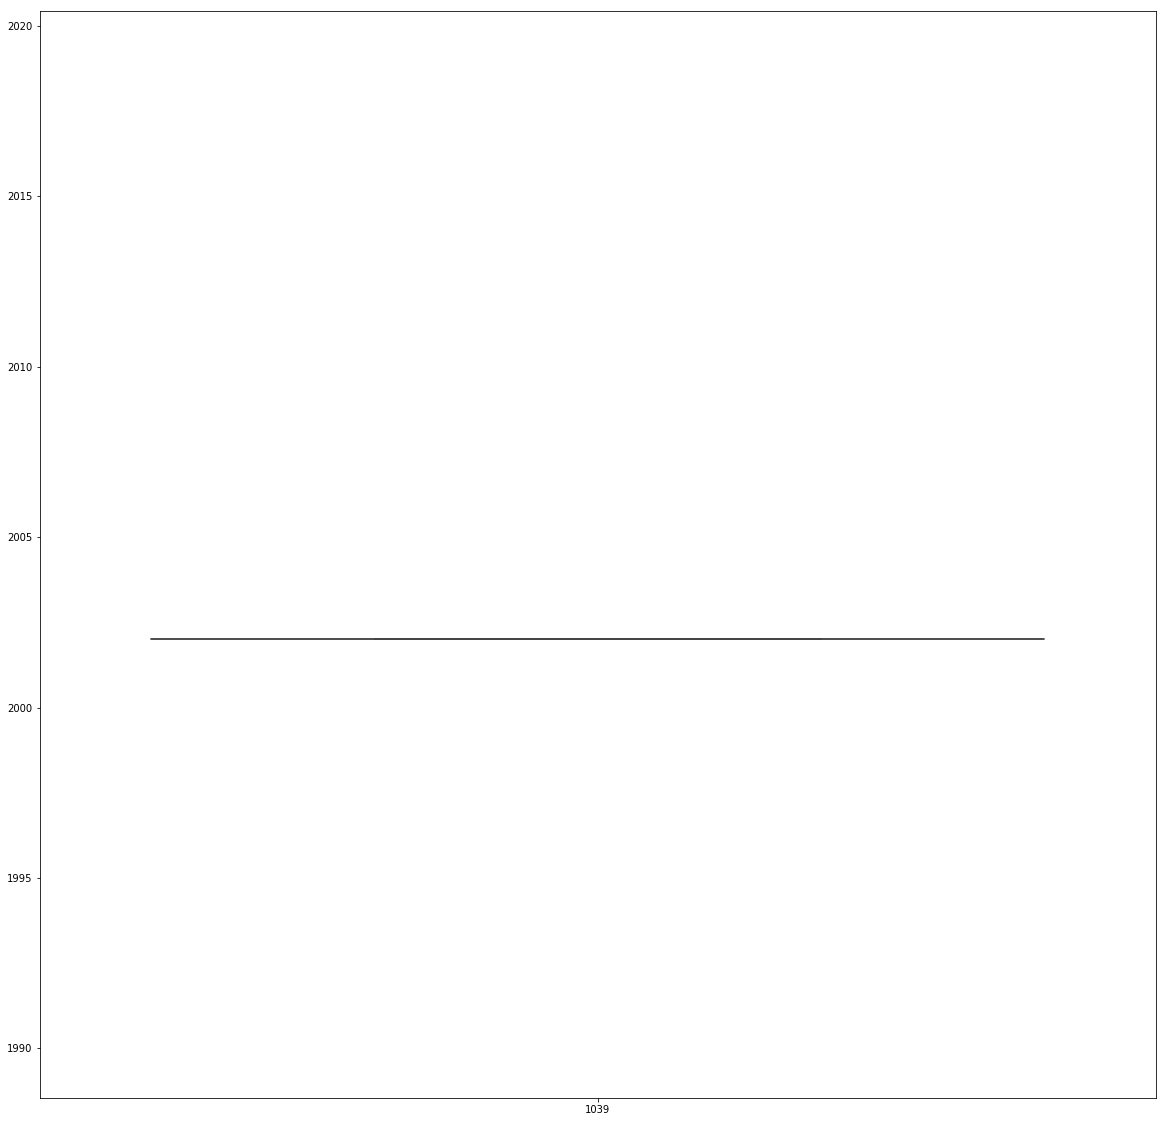

In [115]:
plt.figure(figsize=(20,20))
sns.boxplot(bydate["foreign_profit"],bydate['release_year'])
plt.xticks(rotation=90)

In [95]:
df2.columns

Index(['release_year', 'id', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'domestic_profit', 'domestic_profit_margin',
       'foreign_profit_margin', 'd_f_ratio', 'foreign_profit',
       'foreign_to_dom_ratio'],
      dtype='object')

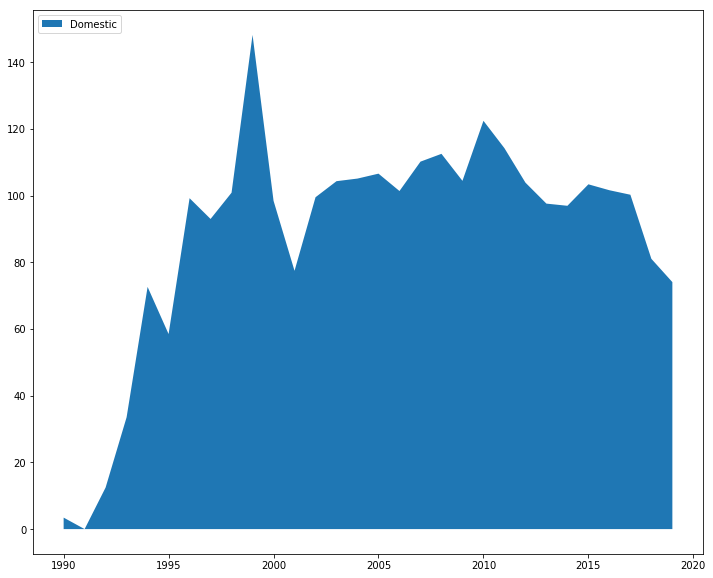

In [96]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters

#percent or total profit
x=df2.release_year
y=[df2.foreign_to_dom_ratio]


 
    
# Plot
plt.figure(figsize=(12,10))
plt.stackplot(x,y, labels=['Domestic','Worldwide'])
plt.legend(loc='upper left')

plt.show()


In [1]:
#this plot is v good, experiemnt with making it look nicer in terms of colors etc.
#percent or total profit
x=df2.release_year
y=[df2['domestic_profit'],df2['foreign_profit']]


 
    
# Plot
plt.figure(figsize=(12,10))
plt.boxplot(x,y)
plt.legend(loc='upper left'

plt.show()


NameError: name 'df2' is not defined

In [65]:
num_movies_year=bydate.groupby('release_month_year').id.count()

In [84]:
quantiles=df.sort_values(by = 'release_date')
q_low_cutoff=pd.to_datetime('2009')
q_high_cutoff=pd.to_datetime('06/06/2019')
bydate_q=bydates.loc[(bydates.release_date >q_low_cutoff)&(bydates.release_date<q_high_cutoff)]

In [88]:
bydate_q=bydate_q.drop(['domestic_gross', 'production_budget', 'release_date'], axis=1)

In [103]:
bydate_q.groupby('release_month_year').sum()
#BOXPLOT!

,id,worldwide_gross,domestic_profit,worldwide_profit
release_month_year,,,,
2009,11333,23994243179,1963417721,15482898179
2010,13046,24231912708,877563745,15090307058
2011,13244,24675265419,842504014,15722313119
2012,12064,27183123906,2038639652,18695988733
2013,11829,26359757029,1768645899,17460370029
2014,12543,25273926856,2308785148,17520519483
2015,17326,27800988606,1953364400,18958809206
2016,10872,28768152741,2069588402,19794912741
2017,8639,28429629005,2048232075,20024466005


In [108]:
bydate_q.groupby(['release_month_year','movie'])gfvr

release_month_year  movie               
2009                (500) Days of Summer    (500) Days of Summer
                    12 Rounds                          12 Rounds
                    1612                                    1612
                    17 Again                            17 Again
                    2012                                    2012
                                                    ...         
2019                Unplanned                          Unplanned
                    Us                                        Us
                    Velvet Buzzsaw                Velvet Buzzsaw
                    What Men Want                  What Men Want
                    Wonder Park                      Wonder Park
Name: movie, Length: 2407, dtype: object